# <span style="color:red"> Lecture 9
---

### Abstract
In this lecture, we want to solve the traveling salesman problem (TSP) for a set of $N=34$ cities with positions $\vec{c}_i$:
1. randomly placed on a circumference of radius $r = 1$;
2. randomly placed inside a square of size lenght $l = 1$.

The best path will be selected using the following cost/loss function:
$$
L^{(1)}(\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N) = \sum_{i=1}^{N} |\vec{x}_i-\vec{x}_{i+1}|
$$
(with $\vec{x}_{N+1}=\vec{x}_1$) where $\{\vec{x}_i\}_{i=1}^N$ is one particular permutation, $P$, of the ordered sequence of cities $\vec{c}_1, \vec{c}_2, \dots, \vec{c}_N$, i.e.

$$
\vec{x}_1, \vec{x}_2, \dots, \vec{x}_N = \vec{c}_{P1}, \vec{c}_{P2}, \dots, \vec{c}_{PN}
$$

Before starting the simulations, we must note that:
1. to reduce the degeneracy of the algorithm, the first city will always coincide for every sequence $\{\vec{x}_i\}_{i=1}^N$, i.e. $\vec{x}_1 = \vec{c}_1$;
2. each city must be visited once and only once in every sequence $\{\vec{x}_i\}_{i=1}^N$, i.e. $\vec{x}_i \neq \vec{x}_j \forall i, j$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def plot_data(dic, shape):
    
    plt.rcParams.update({'font.size':12})
    fig, (ax1, ax2) = plt.subplots(figsize=(17, 8), ncols=2)
    if shape == "circle":
        fig.suptitle("Circle disposition")
    elif shape == "square":
        fig.suptitle("Square disposition")
    
    # city trajectory
    ax = ax1
    ax.plot(dic["cities"]["city_x"], dic["cities"]["city_y"], "ro", label="cities")
    ax.plot(dic["cities"]["city_x"][0], dic["cities"]["city_y"][0], "bo", label="first city")
    ax.plot(dic["chromosome"]["city_x"], dic["chromosome"]["city_y"], 
            color="green", linestyle="--", label="trajectory")
    
    if shape == "circle":
        theta = np.linspace(0, np.pi, 200)
        ax.plot(np.cos(theta), np.sin(theta), color="grey")
        ax.plot(np.cos(theta), -np.sin(theta), color="grey")
    elif shape == "square":
        ax.plot([0, 0], [0, 1], color="grey")
        ax.plot([0, 1], [1, 1], color="grey")
        ax.plot([1, 1], [1, 0], color="grey")
        ax.plot([1, 0], [0, 0], color="grey")
    
    ax.set_title("Best trajectory")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend()
    
    # <L>
    gens = np.arange(0, len(dic["mean_L"]))
    
    ax = ax2
    ax.errorbar(gens, dic["mean_L"]["Mean"], yerr=dic["mean_L"]["Error"], color="blue", label=r"<$L^{(1)}$>")
    ax.plot(gens, np.ones(len(dic["mean_L"]))*dic["chromosome"]["fitness"][0], 
            color="red", linestyle="--", label=r"Final $L^{(1)}$")
    ax.plot(dic["fitness"]["gen"], dic["fitness"]["fitness"], color="green", label=r"$L^{(1)}_{best}$")
    
    ax.set_title(r"<$L^{(1)}$> and $L^{(1)}_{best}$ as functions of the generation")
    ax.set_xlabel("generations")
    ax.set_ylabel(r"<$L^{(1)}$>")
    ax.legend()
    
    plt.show()
    
    print("Best path fitness: ", format(dic["chromosome"]["fitness"][0], '.5f'))
    print("")

### Exercise 09.1

In [3]:
dic_circle, dic_square = {}, {}
dic_circle = {
    "cities": pd.read_csv("../data/circle/cities.dat", sep="\t"),
    "chromosome": pd.read_csv("../data/circle/chromosome.dat", sep="\t"),
    "fitness": pd.read_csv("../data/circle/fitness.dat", sep="\t"),
    "mean_L": pd.read_csv("../data/circle/mean_L.dat", sep="\t")
}
dic_square = {
    "cities": pd.read_csv("../data/square/cities.dat", sep="\t"),
    "chromosome": pd.read_csv("../data/square/chromosome.dat", sep="\t"),
    "fitness": pd.read_csv("../data/square/fitness.dat", sep="\t"),
    "mean_L": pd.read_csv("../data/square/mean_L.dat", sep="\t")
}

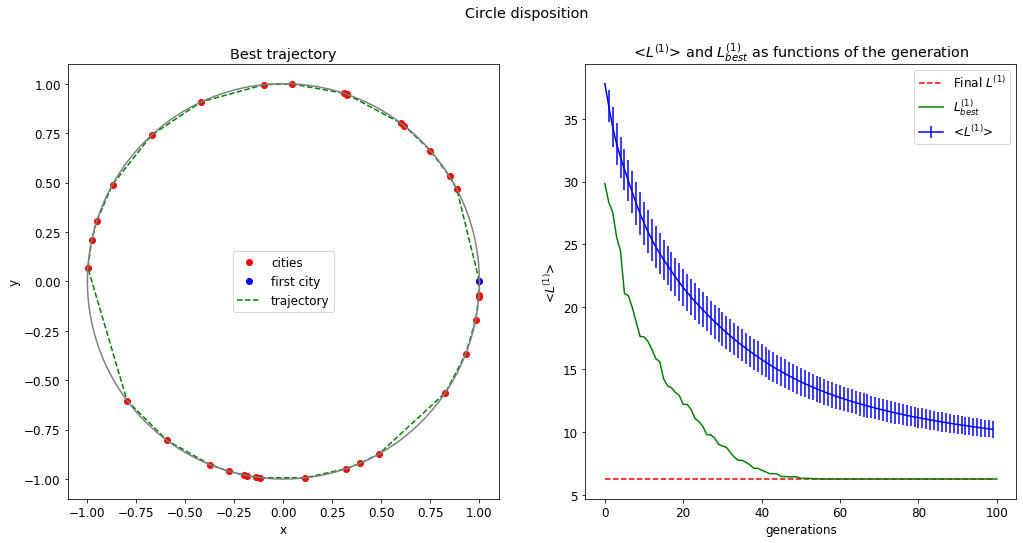

Best path fitness:  6.24839



In [4]:
plot_data(dic_circle, "circle");

First of all, we can see that, for the first (simple) problem, the algorithm finds the actual best path, i.e. the one that follows the circumference. Then, we can also observe that the best sequence displayed in the left picture has been determined since the $50$th generation. Now, we can try and apply the same algorithm to the next more complex problem.

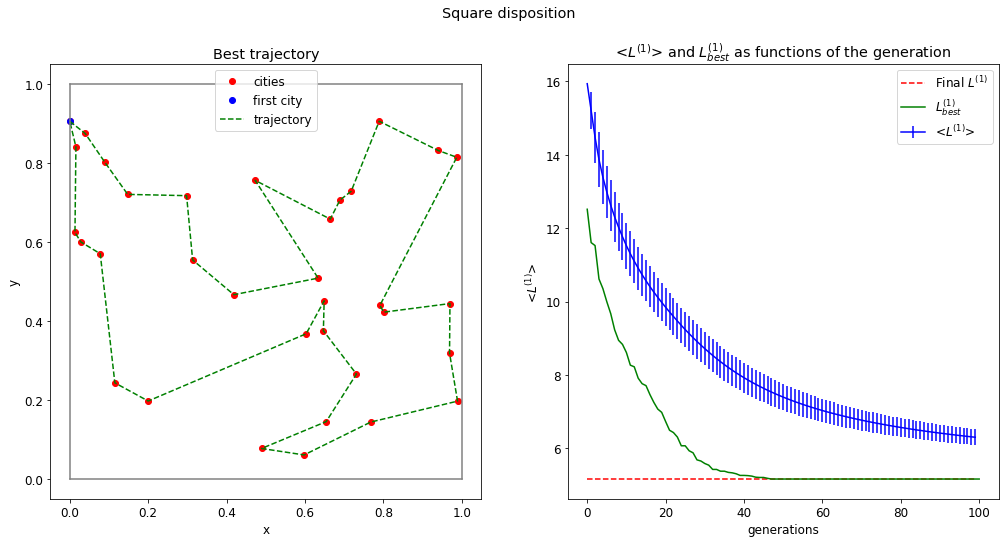

Best path fitness:  5.16812



In [5]:
plot_data(dic_square, "square");

As in the previous case, the algorithm converges to the displayed solution around the $50$th generation. In this case though, we don't actually know if this path is actually the shortest one, i.e. we do not know if the lost function minimum to which the algorithm converged is either the global or a local one. This problem will be more thoroughly adressed in the next lecture.